# S04 T01 Transformació Registre Log amb Regular expressions
***L'anàlisi de registres és una funció important per al control i l'alerta, el compliment de les polítiques de seguretat, l'auditoria i el compliment normatiu, la resposta a incidents de seguretat i fins i tot les investigacions forenses. En analitzar les dades de registre, les empreses poden identificar més fàcilment les possibles amenaces i altres problemes, trobar la causa arrel i iniciar una resposta ràpida per mitigar els riscos.***

## Nivell 1
***L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.***

***Com Científic de Dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".***

### Exercici 1
***Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".***

***Interpretació del Log ***
* Busco per internet per trobar infortmació relativa al registre del log, he trobat aquesta pàgina que m'ha permes interpretar la informació, encara que enc ara em quedaría evaluar una mica mes en profunditat els tipus de dades a la que pertany cada item

***https://publib.boulder.ibm.com/tividd/td/ITWSA/ITWSA_info45/en_US/HTML/guide/c-logs.html***


***The following example shows these fields populated with values in a common log file record:***

***125.125.125.125 - dsmith [10/Oct/1999:21:15:05 +0500] "GET /index.html HTTP/1.0" 200 1043***


* host (125.125.125.125 in the example)
    The IP address or host/subdomain name of the HTTP client that made the HTTP resource request.
* rfc931 ("-" in the example)
    The identifier used to identify the client making the HTTP request. 
    If no value is present, a "-" is substituted.

* username (dsmith in the example)
    The username, (or user ID) used by the client for authentication. 
    If no value is present, a "-" is substituted.

* date:time timezone ([10/Oct/1999:21:15:05 +0500] in the example)
    The date and time stamp of the HTTP request.

* request ("GET /index.html HTTP/1.0" in the example)
    The HTTP request. The request field contains three pieces of information. The main piece 
    is the requested resource (index.html). The request field also contains the
    HTTP method (GET) and the HTTP protocol version (1.0).

* statuscode (200 in the example)
    The status is the numeric code indicating the success or failure of the HTTP request.

* bytes (1043 in the example)
    The bytes field is a numeric field containing the number of bytes of data 
    transferred as part of  the HTTP request, not including the HTTP header.
* referrer ("http://www.ibm.com/" in the example)
    The URL which linked the user to your site. (Optional)
* user_agent 
    ("Mozilla/4.05 [en] (WinNT; I)" in the example)
    

   web           www.akumenius.com
   ip            66.249.76.216 
   identifier    - 
   username      - 
   dateTime      [23/Feb/2014:03:10:31 +0100]
   tipoAccion    "GET 
           recurso      /hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-
                       8460b-destinos.html 
           protocolo     HTTP/1.1" 
   status        404 
   respuestaSize 3100 
   referer       "-" 
   user_agent    "Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)" 
   vlog           VLOG=-

In [23]:
# Importem les llibreries de pandas i d'expresions regulars i obril el txt
import re
import pandas as pd
import numpy as np


In [24]:
#Es construeix un expresio regular per cada component de la linea de logs
#l final s'ajunten tots amn un espai

# Url , pot començar amb www o be directament amb l'adrça
webUrl1 = r'((\w+.)?(\w(\w+\-))*?\w+\.(com|es)|localhost)'

# Adreça IP
ipAddres = r'((\d{1,3}\.){3}\d{1,3})'

# Identifier : no existeix en el log pero pot ser qualsevol cosa que no comenci per spai,
# per defecte es - al log
identifier = r'([^ ]+)' 
#identifier = r'([\w\-])+' 

# Usuari :existeix em molt pocs registres,la expresio regular igual qie l'anteior
userName = r'([^ ]+)'
#userName = r'(\w|\-]+)'
#a datetime fem coincidir amb el formaat  : dia/mes/any: hora:min:seg 
dateTime = r'\[(\d{1,2}\/\w{3}\/\d{4}:\d{2}:\d{2}:\d{2} \+\d{4})\]'
# operacio comença amb " seguit de un nombre de quallsevol de caracters i acaba amb"
request = r'"(.*?)"'
status = r'(\d{2,5}|-)'
respuesta = r'(\d+|-)'
referer = r'"(.*?)"'
user_agent = r'"(.*?)"'
vlog = r'(.*)'
#separador
sp=" "
patro = webUrl1+sp+ipAddres+sp+identifier+sp+userName+sp+dateTime+sp+request+sp+status+sp+respuesta+sp+referer+sp+user_agent+sp+vlog


In [25]:
# llegim linea a linea el fitxer log i anem generant una llista 
lineDf=[]
with open("Web_access_log-akumenius.com.txt", "r") as fileLog:
    for lineTxt in fileLog:
        linDf=lineDf.append(lineTxt)




In [26]:
#Convertim llista a dataframe i canviem nom a la colkumna
fileDf=pd.DataFrame(lineDf)
fileDf.rename(columns={0:"webUrl"}, inplace=True)


In [27]:
# Apliquem el patro sustituint les columnes per els patrons strobats
fileDf = fileDf["webUrl"].str.extract(patro, expand=True)

In [28]:
fileDf.head(10)
#eliminem les columnes dels subgrups que s'hauran generat al definir les repeticions dels regex


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,localhost,NaN,NaN,NaN,NaN,127.0.0.1,0.,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
1,localhost,NaN,NaN,NaN,NaN,127.0.0.1,0.,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
2,localhost,NaN,NaN,NaN,NaN,127.0.0.1,0.,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
3,localhost,NaN,NaN,NaN,NaN,127.0.0.1,0.,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
4,localhost,NaN,NaN,NaN,NaN,127.0.0.1,0.,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
5,localhost,NaN,NaN,NaN,NaN,127.0.0.1,0.,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
6,localhost,NaN,NaN,NaN,NaN,127.0.0.1,0.,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
7,localhost,NaN,NaN,NaN,NaN,127.0.0.1,0.,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
8,localhost,NaN,NaN,NaN,NaN,127.0.0.1,0.,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
9,localhost,NaN,NaN,NaN,NaN,127.0.0.1,0.,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-


## Nivell 2

### Exercici 2
***Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.***

In [29]:
fileDf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,261873,247746,0,0,247746,261873,261873,261873,261873,261873,261873,261873,261873,261873,261873,261873
unique,5,3,0,0,2,2921,256,1,2,118735,66764,12,15548,2507,735,1
top,www.akumenius.com,www.,NaN,NaN,com,66.249.76.216,76.,-,-,28/Feb/2014:04:16:25 +0100,OPTIONS * HTTP/1.0,200,-,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
freq,232300,232300,NaN,NaN,247652,46382,47268,261873,261846,83,13892,226382,42335,99547,50914,261873


***Analitzem les columnes que sembla que no contenen informació valuosa***

In [30]:
# Columnes candidates directes 1,2,3,4,6 , generades per la expresió regular iteracions probablemente
fileDf.drop(labels=[1,2,3,4,6], axis=1, inplace=True)


In [31]:
fileDf

,0,5,7,8,9,10,11,12,13,14,15
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,-,-,02/Mar/2014:03:05:39 +0100,GET / HTTP/1.1,200,7528,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,VLOG=-
261869,www.akumenius.com,74.86.158.107,-,-,02/Mar/2014:03:09:52 +0100,HEAD / HTTP/1.1,200,-,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,VLOG=-
261870,localhost,127.0.0.1,-,-,02/Mar/2014:03:10:18 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
261871,localhost,127.0.0.1,-,-,02/Mar/2014:03:10:18 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-


In [32]:
# Cheks columnes 7,8, que sembla qie aporten poca informació(fileDf[7].unique().tolist()
fileDf[8].unique().tolist()


['-', 'clarcat']

In [33]:
fileDf[7].unique().tolist()

['-']

In [34]:
fileDf.drop(labels=[7], axis=1, inplace=True)

In [35]:
fileDf.tail(25)

,0,5,8,9,10,11,12,13,14,15
261848,www.akumenius.com,66.249.76.216,-,02/Mar/2014:02:56:17 +0100,GET /robots.txt HTTP/1.1,200,743,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
261849,www.akumenius.com,66.249.76.216,-,02/Mar/2014:02:57:21 +0100,GET /destinosCaracteristicas/hoteles-baratos-e...,200,6401,-,Mozilla/5.0 (iPhone; CPU iPhone OS 6_0 like Ma...,VLOG=-
261850,www.akumenius.com,66.249.76.216,-,02/Mar/2014:02:57:46 +0100,GET /destinos-caracteristicas/hoteles-baratos-...,200,6397,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
261851,www.akumenius.com,74.86.158.107,-,02/Mar/2014:02:59:52 +0100,HEAD / HTTP/1.1,200,-,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,VLOG=-
261852,www.akumenius.com,66.249.76.216,-,02/Mar/2014:03:00:15 +0100,GET /destinosCaracteristicas/hoteles-baratos-e...,200,6401,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
261853,www.akumenius.com,176.31.255.177,-,02/Mar/2014:03:00:01 +0100,GET /hotels-consulted-update HTTP/1.0,200,-,-,Wget/1.12 (linux-gnu),VLOG=-
261854,www.akumenius.com,66.249.76.216,-,02/Mar/2014:03:00:48 +0100,GET /destinos-baratos/hoteles-en-Ensenada_MEXI...,200,15614,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
261855,www.akumenius.com,157.55.32.185,-,02/Mar/2014:03:00:59 +0100,GET /destinosCaracteristicas/hoteles-baratos-e...,200,6406,-,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,VLOG=-
261856,www.akumenius.com,66.249.76.216,-,02/Mar/2014:03:01:10 +0100,GET /escapadas/ocio-andorra-327.html HTTP/1.1,200,9258,-,Mozilla/5.0 (iPhone; CPU iPhone OS 6_0 like Ma...,VLOG=-
261857,www.akumenius.com,157.55.32.185,-,02/Mar/2014:03:01:15 +0100,GET /escapadas/escapada-especial-carnaval-hote...,200,3100,-,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,VLOG=-


***renombrem columnes***

In [36]:
renomColumna= {0: "Site", 5: "IP", 8:"Username",9: "DateTime", 10: "Operation", 
          11: "StatusCode",12: "TransferSize", 13: "Referer", 14: "UserAgent", 15: "Vlog"}
fileDf.rename(columns=renomColumna, inplace=True)


In [37]:
fileDf

,Site,IP,Username,DateTime,Operation,StatusCode,TransferSize,Referer,UserAgent,Vlog
0,localhost,127.0.0.1,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,-,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,-,02/Mar/2014:03:05:39 +0100,GET / HTTP/1.1,200,7528,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,VLOG=-
261869,www.akumenius.com,74.86.158.107,-,02/Mar/2014:03:09:52 +0100,HEAD / HTTP/1.1,200,-,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,VLOG=-
261870,localhost,127.0.0.1,-,02/Mar/2014:03:10:18 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
261871,localhost,127.0.0.1,-,02/Mar/2014:03:10:18 +0100,OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-


In [38]:
fileDf.describe()

,Site,IP,Username,DateTime,Operation,StatusCode,TransferSize,Referer,UserAgent,Vlog
count,261873,261873,261873,261873,261873,261873,261873,261873,261873,261873
unique,5,2921,2,118735,66764,12,15548,2507,735,1
top,www.akumenius.com,66.249.76.216,-,28/Feb/2014:04:16:25 +0100,OPTIONS * HTTP/1.0,200,-,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
freq,232300,46382,261846,83,13892,226382,42335,99547,50914,261873


In [39]:
# Abans de transformar els tipus de dades hem d'eliminar les dades que no fan referència al tipus
#El fitxer log quan no hi ha dades en un cap li assigna el valor "-", hauriem de passar la dada a nul per tal 
# que la conversió no falli

fileDf.replace("-", np.nan, inplace=True)
fileDf["StatusCode"] = pd.to_numeric(fileDf.StatusCode, downcast='integer')
fileDf["TransferSize"] = pd.to_numeric(fileDf.TransferSize, downcast='integer')
fileDf["DateTime"] = pd.to_datetime(fileDf.DateTime, format="%d/%b/%Y:%H:%M:%S %z")

In [40]:
fileDf["IP"] = fileDf["IP"].astype(str)

In [ ]:
import requests
import json
import re
import pandas as pd
import numpy as np
import time

In [41]:
fileDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype                               
---  ------        --------------   -----                               
 0   Site          261873 non-null  object                              
 1   IP            261873 non-null  object                              
 2   Username      27 non-null      object                              
 3   DateTime      261873 non-null  datetime64[ns, pytz.FixedOffset(60)]
 4   Operation     261836 non-null  object                              
 5   StatusCode    261873 non-null  int16                               
 6   TransferSize  219538 non-null  float64                             
 7   Referer       162326 non-null  object                              
 8   UserAgent     261654 non-null  object                              
 9   Vlog          261873 non-null  object                              
dtypes: datet

In [42]:
fileDf

,Site,IP,Username,DateTime,Operation,StatusCode,TransferSize,Referer,UserAgent,Vlog
0,localhost,127.0.0.1,NaN,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,NaN,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,NaN,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,NaN,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,NaN,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-
...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,NaN,2014-03-02 03:05:39+01:00,GET / HTTP/1.1,200,7528.0,NaN,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,VLOG=-
261869,www.akumenius.com,74.86.158.107,NaN,2014-03-02 03:09:52+01:00,HEAD / HTTP/1.1,200,NaN,NaN,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,VLOG=-
261870,localhost,127.0.0.1,NaN,2014-03-02 03:10:18+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-
261871,localhost,127.0.0.1,NaN,2014-03-02 03:10:18+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-


### Exercici 3 
***Geolocalitzxa les IP's***

***Instalem i importem  ip2geotools $ pip install ip2geotools***

***ATENCIÓ No ha sigut satisfactory perque despres de 700 traduccions ja no m'ha deixat fer mes"***

In [2]:
from ip2geotools.databases.noncommercial import DbIpCity

In [59]:
for i in range(len(myIpsDf['IP'])):
    response = DbIpCity.get(myIpsDf['IP'][i], api_key='free')
    ipDict=json.loads(response.to_json())
    ipDictDf=pd.DataFrame([ipDict])
    ipgeoloc=ipgeoloc.append(ipDictDf,ignore_index=True)
## Ha fallat per superar la capacitat màxima de peticions

NameError: name 'DbIpCity' is not defined

* probem amb la APi "http://ip-api.com/json/" 

***Creem una Df amb les IP uniques***

In [43]:
#Extraiem totes les IP uniques per geolocalitzar cada IP
myIps=fileDf['IP'].unique()

In [45]:
myIpsDf=pd.DataFrame(myIps,columns=["IP"])

In [46]:

myIpsDf

,IP
0,127.0.0.1
1,66.249.76.216
2,5.255.253.53
3,157.55.35.112
4,193.111.141.116
...,...
2916,46.222.83.180
2917,79.155.78.117
2918,217.174.248.179
2919,188.135.173.80


***Fem servir la url "http://ip-api.com/json/" per fer les traduccions***

***Atencio , nomes 45 peticions al minut , per tant fem un bucle amn espera per no estra limitats***

* Funcio demanar geolocalitzacio per IP, retorna una Df  amb la IP i tota la info

In [51]:


# URL de la API
api_url = "http://ip-api.com/json/"
ipgeoloc=pd.DataFrame()
# Definimos los parametros de respuesta que queremos obtener
parametros = 'status,country,city,lat,lon'
data = {"fields":parametros}

#Funcio per donada una Ip extreu total la infotrmació proporcionada per la url
#retorna un diccionari amb la ip i tot el carro de informació
def ip_geolocalitza(ip=""):
 # Nos conectamos con la API
 res = requests.get(api_url+ip, data=data)
 # Obtenemos y procesamos la respuesta JSON
 ipDict = json.loads(res.content)
 ipDict['IP']=ip
 ipDictDf=pd.DataFrame([ipDict])
 
 return ipDictDf


* Iteracio per carregar la geolocalitzacio relatriva las ips, bucle de espera de 65 seg per no violar limits

In [57]:
# Fem bucle amb espwera i a cada iteració dfem apppend de la df proporcionada
# Iterem 70 vegades x 42 fins arribar a les 2921 Ip's
ipgeoloc=pd.DataFrame()
iterations=2921/42
print (iterations)
print (int(iterations))
pos=0
for i in range(70):
    for j in range(42):
        if pos >=2921:
            break
        ipgeoloc=ipgeoloc.append(ip_geolocalitza(myIpsDf['IP'][pos]),ignore_index=True)
        pos=pos+1 
    print("dorm iteracio"+ str(i) +"posicio:"+ str(pos) )
    time.sleep(65)
    


69.54761904761905
69
dorm iteracio0posicio:42
dorm iteracio1posicio:84
dorm iteracio2posicio:126
dorm iteracio3posicio:168
dorm iteracio4posicio:210
dorm iteracio5posicio:252
dorm iteracio6posicio:294
dorm iteracio7posicio:336
dorm iteracio8posicio:378
dorm iteracio9posicio:420
dorm iteracio10posicio:462
dorm iteracio11posicio:504
dorm iteracio12posicio:546
dorm iteracio13posicio:588
dorm iteracio14posicio:630
dorm iteracio15posicio:672
dorm iteracio16posicio:714
dorm iteracio17posicio:756
dorm iteracio18posicio:798
dorm iteracio19posicio:840
dorm iteracio20posicio:882
dorm iteracio21posicio:924
dorm iteracio22posicio:966
dorm iteracio23posicio:1008
dorm iteracio24posicio:1050
dorm iteracio25posicio:1092
dorm iteracio26posicio:1134
dorm iteracio27posicio:1176
dorm iteracio28posicio:1218
dorm iteracio29posicio:1260
dorm iteracio30posicio:1302
dorm iteracio31posicio:1344
dorm iteracio32posicio:1386
dorm iteracio33posicio:1428
dorm iteracio34posicio:1470
dorm iteracio35posicio:1512
dorm i

In [60]:
#Guardem la informació amb formar csv separat per tabuladors
ipgeoloc.to_csv('IpGeoloc.csv',sep="\t")

In [61]:
#Observem les columnes necesaries per incorporar la geolocalitzacio al fitxer princilal
ipgeoloc

,status,message,query,IP,country,countryCode,region,regionName,city,zip,lat,lon,timezone,isp,org,as
0,fail,reserved range,127.0.0.1,127.0.0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,success,NaN,66.249.76.216,66.249.76.216,United States,US,CA,California,Mountain View,94043,37.4220,-122.08400,America/Los_Angeles,Google LLC,Google LLC,AS15169 Google LLC
2,success,NaN,5.255.253.53,5.255.253.53,Russia,RU,MOW,Moscow,Moscow,101194,55.7332,37.58330,Europe/Moscow,Yandex enterprise network,Yandex LLC,AS208722 Global DC Oy
3,success,NaN,157.55.35.112,157.55.35.112,Canada,CA,ON,Ontario,Toronto,M5A,43.6532,-79.38320,America/Toronto,Microsoft Corporation,Microsoft Corporation,AS8075 Microsoft Corporation
4,success,NaN,193.111.141.116,193.111.141.116,Germany,DE,NW,North Rhine-Westphalia,Düsseldorf,40472,51.2705,6.81440,Europe/Berlin,Ripe NCC,Ripe NCC,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,success,NaN,46.222.83.180,46.222.83.180,Spain,ES,MD,Madrid,Madrid,28028,40.4163,-3.69340,Europe/Madrid,XFERA Moviles S.A,Xfera Moviles SA,AS15704 XTRA TELECOM S.A.
2917,success,NaN,79.155.78.117,79.155.78.117,Spain,ES,CT,Catalonia,Barcelona,08030,41.3870,2.17010,Europe/Madrid,RIMA (Red IP Multi Acceso),,AS3352 TELEFONICA DE ESPANA
2918,success,NaN,217.174.248.179,217.174.248.179,United Kingdom,GB,ENG,England,Gloucester,GL1 2EX,51.8613,-2.25056,Europe/London,Fasthosts Internet Ltd,Fasthosts Internet Limited,AS8560 IONOS SE
2919,success,NaN,188.135.173.80,188.135.173.80,Italy,IT,25,Lombardy,Desio,20832,45.6140,9.21987,Europe/Rome,Aria S.P.A,Aria SPA,


In [62]:
ipgeoloc.columns

Index(['status', 'message', 'query', 'IP', 'country', 'countryCode', 'region',
       'regionName', 'city', 'zip', 'lat', 'lon', 'timezone', 'isp', 'org',
       'as'],
      dtype='object')

In [63]:
ipgeoloc.drop(labels=['status', 'message', 'query','countryCode','region', 'isp', 'org','as'], axis=1, inplace=True)

In [64]:
ipgeoloc

,IP,country,regionName,city,zip,lat,lon,timezone
0,127.0.0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66.249.76.216,United States,California,Mountain View,94043,37.4220,-122.08400,America/Los_Angeles
2,5.255.253.53,Russia,Moscow,Moscow,101194,55.7332,37.58330,Europe/Moscow
3,157.55.35.112,Canada,Ontario,Toronto,M5A,43.6532,-79.38320,America/Toronto
4,193.111.141.116,Germany,North Rhine-Westphalia,Düsseldorf,40472,51.2705,6.81440,Europe/Berlin
...,...,...,...,...,...,...,...,...
2916,46.222.83.180,Spain,Madrid,Madrid,28028,40.4163,-3.69340,Europe/Madrid
2917,79.155.78.117,Spain,Catalonia,Barcelona,08030,41.3870,2.17010,Europe/Madrid
2918,217.174.248.179,United Kingdom,England,Gloucester,GL1 2EX,51.8613,-2.25056,Europe/London
2919,188.135.173.80,Italy,Lombardy,Desio,20832,45.6140,9.21987,Europe/Rome


In [66]:
IpFinalGeolocDf=pd.merge(fileDf,ipgeoloc,on="IP",how='left')

***Ja tenim el fichero amb les IP i tota la informacio de la geolocalitzacio***


In [67]:
IpFinalGeolocDf

,Site,IP,Username,DateTime,Operation,StatusCode,TransferSize,Referer,UserAgent,Vlog,country,regionName,city,zip,lat,lon,timezone
0,localhost,127.0.0.1,NaN,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,localhost,127.0.0.1,NaN,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,localhost,127.0.0.1,NaN,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,localhost,127.0.0.1,NaN,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,localhost,127.0.0.1,NaN,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,NaN,2014-03-02 03:05:39+01:00,GET / HTTP/1.1,200,7528.0,NaN,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,VLOG=-,Russia,Moscow,Moscow,101194,55.7332,37.5833,Europe/Moscow
261869,www.akumenius.com,74.86.158.107,NaN,2014-03-02 03:09:52+01:00,HEAD / HTTP/1.1,200,NaN,NaN,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,VLOG=-,United States,Texas,Dallas,75270,32.7767,-96.8050,America/Chicago
261870,localhost,127.0.0.1,NaN,2014-03-02 03:10:18+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261871,localhost,127.0.0.1,NaN,2014-03-02 03:10:18+01:00,OPTIONS * HTTP/1.0,200,NaN,NaN,Apache (internal dummy connection),VLOG=-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Diagrama Pie per paisos i accesos

In [86]:
dataPieDf=IpFinalGeolocDf.groupby(['country'])['country'].count()

In [96]:
dataPieDf[dataPieDf.values>200]

country
Argentina           1007
Austria              224
Brazil               707
Canada              4085
Chile                357
China               7010
Colombia             526
Ecuador              323
France              1838
Germany             2051
Italy               1044
Mexico              1244
Netherlands         6305
Portugal             422
Russia               670
Spain             149200
United Kingdom      1076
United States      67042
Uruguay              242
Name: country, dtype: int64

In [89]:
dataPie.index

Index(['Algeria', 'Andorra', 'Argentina', 'Australia', 'Austria', 'Bahamas',
       'Belgium', 'Bolivia', 'Bonaire, Saint Eustatius and Saba ', 'Brazil',
       'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Curacao',
       'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'France', 'Germany', 'Greece', 'Guatemala', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Japan', 'Mexico',
       'Mongolia', 'Netherlands', 'Nicaragua', 'Nigeria', 'North Macedonia',
       'Norway', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Venezuela', 'Vietnam'],
      dtype='object', name='country')

## Nivell 3

<AxesSubplot:title={'center':'IP accesos per País'}, ylabel='country'>

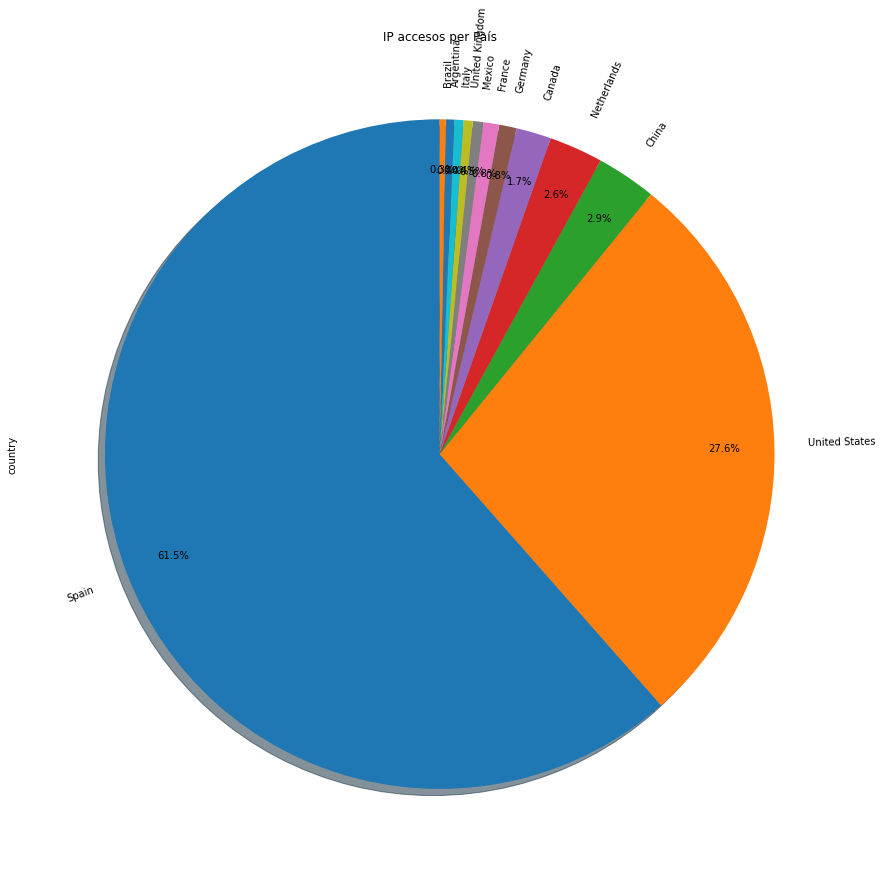

In [108]:

import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
plt.title('IP accesos per País')
plt.axis('equal')
dataPieDf.sort_values(ascending=False)[:12].plot.pie(autopct='%1.1f%%', shadow=True,pctdistance=.85,rotatelabels=True, startangle=90)


In [112]:
#Importem el mpl_toolkits per generar mapes
import time
from mpl_toolkits.basemap.test import Basemap
import matplotlib.pyplot as plt


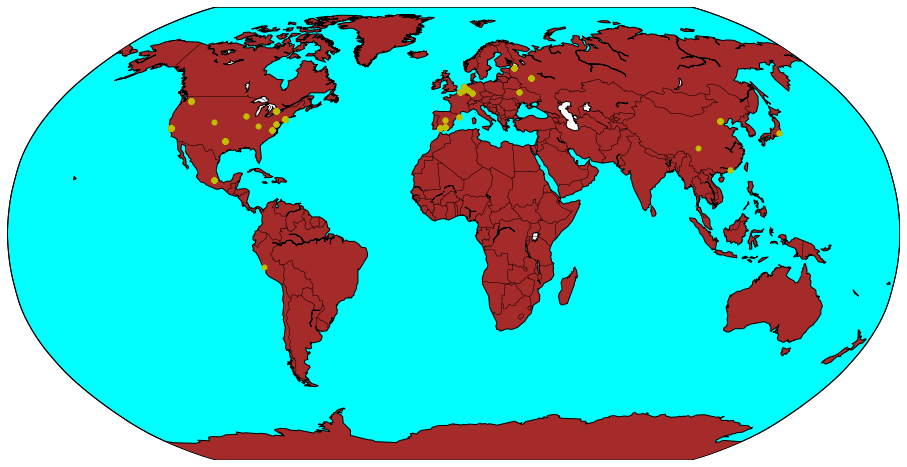

In [136]:
#geo= Nominatim(user_agent="Myapp",timeout=2)
plt.figure(figsize=(16,12))
# configurem el mapa
my_map=Basemap(projection='robin',lon_0=0,lat_0=0)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='brown')
my_map.drawmapboundary(fill_color='aqua')
for i in range(6000):
    #afegim coordinades dels punts , no tots perque triga molt
    x,y=my_map(IpFinalGeolocDf['lon'][i],IpFinalGeolocDf['lat'][i])
    my_map.plot(x,y,color='y',marker='o',markersize="5")
